In [235]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/digit-recognizer/train.csv')

In [236]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into valid and training sets

data_valid = data[0:1000].T
Y_valid = data_valid[0]
X_valid = data_valid[1:n]
X_valid = X_valid / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [238]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [239]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [240]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 7 ... 5 7 9] [3 1 4 ... 3 3 3]
0.0737560975609756
Iteration:  10
[7 7 9 ... 9 2 3] [3 1 4 ... 3 3 3]
0.19641463414634147
Iteration:  20
[8 9 9 ... 9 2 3] [3 1 4 ... 3 3 3]
0.24753658536585366
Iteration:  30
[8 9 9 ... 9 3 3] [3 1 4 ... 3 3 3]
0.31070731707317073
Iteration:  40
[8 9 9 ... 9 3 3] [3 1 4 ... 3 3 3]
0.3858048780487805
Iteration:  50
[8 3 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.4631707317073171
Iteration:  60
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.5376585365853659
Iteration:  70
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.5934878048780488
Iteration:  80
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.6308780487804878
Iteration:  90
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.6590487804878049
Iteration:  100
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.6822682926829269
Iteration:  110
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.6999024390243902
Iteration:  120
[3 1 9 ... 3 3 3] [3 1 4 ... 3 3 3]
0.7145853658536585
Iteration:  130
[3 1 4 ... 3 3 3] [3 1 4 ... 3 3 3]
0.7273658536585366
Iteration:  14

In [241]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


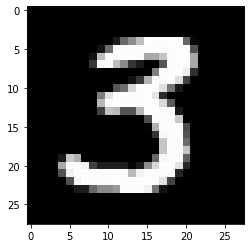

Prediction:  [1]
Label:  1


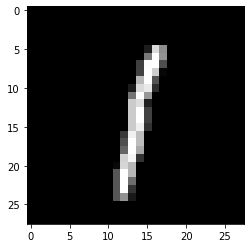

Prediction:  [4]
Label:  4


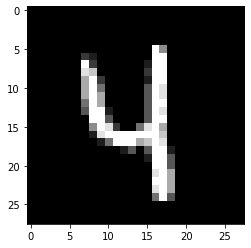

Prediction:  [4]
Label:  5


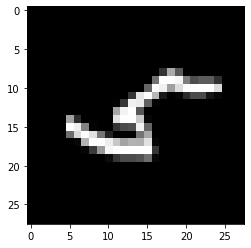

In [242]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [249]:
valid_predictions = make_predictions(X_valid, W1, b1, W2, b2)
accuracy = get_accuracy(valid_predictions, Y_valid)

[1 4 8 0 8 2 0 0 2 5 1 6 3 9 8 9 8 7 7 9 4 4 5 6 2 6 7 9 0 7 4 1 1 6 7 2 5
 7 5 3 9 0 1 3 5 2 8 5 4 7 3 4 2 0 4 6 0 1 3 3 3 4 3 3 5 8 5 6 9 8 9 4 1 9
 6 6 2 8 0 4 4 0 5 1 8 5 3 7 2 3 5 9 9 6 7 5 2 7 5 3 2 5 6 3 0 6 8 7 7 5 0
 9 3 7 3 0 3 6 3 7 7 2 6 8 4 0 4 0 1 8 7 2 9 6 9 2 4 9 9 5 7 5 3 4 2 4 9 2
 7 1 7 6 5 1 7 8 1 9 5 7 3 6 4 6 6 1 1 7 1 7 1 1 8 7 7 5 6 2 2 1 8 5 3 4 5
 1 1 6 4 0 5 1 3 6 9 0 4 1 1 2 5 9 6 8 4 4 6 9 3 9 0 8 8 7 8 3 0 2 9 2 6 0
 8 0 3 2 7 1 3 7 2 7 5 7 1 2 6 8 6 9 0 0 1 4 2 4 8 5 8 4 1 5 2 3 4 8 7 4 9
 0 3 1 3 1 2 8 8 4 5 5 2 8 7 1 6 7 7 9 6 9 9 7 7 3 4 2 5 7 9 7 9 1 1 1 4 1
 7 6 8 6 3 8 2 6 3 3 8 7 4 6 4 7 7 4 3 5 8 6 6 8 2 8 3 5 1 0 8 0 5 4 1 9 5
 6 0 1 9 8 9 7 4 6 8 1 3 8 6 6 9 4 1 4 1 4 4 0 8 7 4 5 2 2 8 3 4 7 0 0 1 2
 9 9 2 2 6 4 7 0 3 6 0 5 1 5 2 5 6 3 9 3 4 5 6 1 8 0 8 8 8 1 9 9 8 8 5 3 6
 0 0 1 8 9 1 7 6 7 9 6 0 4 7 8 4 5 7 9 0 5 1 8 6 8 2 5 0 4 2 1 2 9 6 3 6 6
 5 6 8 7 7 6 7 3 8 4 4 0 1 1 8 0 2 3 7 7 2 5 6 7 3 2 8 1 0 7 3 6 4 7 7 1 6
 1 8 1 2 6 8 2 7 0 3 2 0 